# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie Recommendation - EDA and Processing</p>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

main_color = "#003672"
three_colors_palette = ["#003672", "#943400", "#ED8B75"]
five_colors_palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]
eight_colors_palette = ["#003672", "#943400", "#ED8B75", "#25044B", "#63145B", "#993365", "#C85C6C", "#ED8B75"]

S = "\033[1m" + '\033[96m' # Used for colored strings
E = "\033[0m"

## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie DataFrame</p>

In [2]:
movie_df = pd.read_csv("IMDB-Dataset\movies.csv", index_col="movieId")
movie_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
print(S+"Seems we have a lot of unique values for the genres, we need to do some feature engineering"+E)
movie_df.genres.unique().shape[0] , movie_df.shape[0]

Seems we have a lot of unique values for the genres, we need to do some feature engineering


(938, 10329)

## Working with genres

In [4]:
genres = []
for string in movie_df.genres.unique():
    tmp_genres = string.split("|")
    for genre in tmp_genres:
        if genre not in genres:
            genres.append(genre)

genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'War',
 'Musical',
 'Documentary',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [5]:
print(S+"IMAX isn't really a genre, but we'll keep it to see if we get more from it.")
genres.pop() # get rid of "(no genres listed)"

IMAX isn't really a genre, but we'll keep it to see if we get more from it.


'(no genres listed)'

In [6]:
movie_df.isna().sum()

title     0
genres    0
dtype: int64

In [7]:
movie_df = movie_df.reindex(columns=list(movie_df.columns)+genres)
movie_df.head()

,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ids = movie_df.index

for i, string in zip(ids, movie_df.genres):
    tmp_genres = string.split("|")
    for genre in genres:
        if genre  in tmp_genres:
            movie_df.at[i, genre] = 1
        else :
            movie_df.at[i, genre] = 0

movie_df.drop(columns="genres", axis=1, inplace=True)

In [9]:
for genre in genres:
    movie_df[genre] = pd.to_numeric(movie_df[genre], downcast="integer")

movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Working with dates

In [10]:
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
movie_df["Year"] = movie_df.title.str[-5:-1]
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir,Year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [12]:
movie_df.drop(columns="title",axis=1, inplace=True)

In [13]:
print(S+"The only things missing are standardization and reducing memory but we'll do it after the EDA"+E)

The only things missing are standardization and reducing memory but we'll do it after the EDA


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Ratings DataFrame</p>

In [35]:
ratings_df = pd.read_csv("IMDB-Dataset\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [36]:
import datetime as dt

ratings_df.timestamp = ratings_df.timestamp.apply(dt.datetime.fromtimestamp)
ratings_df["day"] = ratings_df.timestamp.dt.strftime("%Y-%m-%d")
ratings_df.drop(columns="timestamp", axis=1, inplace=True)
ratings_df

,userId,movieId,rating,day
0,1,16,4.0,2008-08-05
1,1,24,1.5,2008-08-05
2,1,32,4.0,2008-08-05
3,1,47,4.0,2008-08-05
4,1,50,4.0,2008-08-05
...,...,...,...,...
105334,668,142488,4.0,2015-12-31
105335,668,142507,3.5,2015-12-31
105336,668,143385,4.0,2015-11-01
105337,668,144976,2.5,2015-11-27


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

In [41]:
genre_df = movie_df.drop(columns="Year", axis=1)
genre_df.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
ratings_df.head() , movie_df.head()

(   userId  movieId  rating         day
 0       1       16     4.0  2008-08-05
 1       1       24     1.5  2008-08-05
 2       1       32     4.0  2008-08-05
 3       1       47     4.0  2008-08-05
 4       1       50     4.0  2008-08-05,
          Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  \
 movieId                                                                    
 1                1          1         1       1        1        0      0   
 2                1          0         1       0        1        0      0   
 3                0          0         0       1        0        1      0   
 4                0          0         0       1        0        1      1   
 5                0          0         0       1        0        0      0   
 
          Action  Crime  Thriller  Horror  Mystery  Sci-Fi  IMAX  War  Musical  \
 movieId                                                                         
 1             0      0         0       0        0    

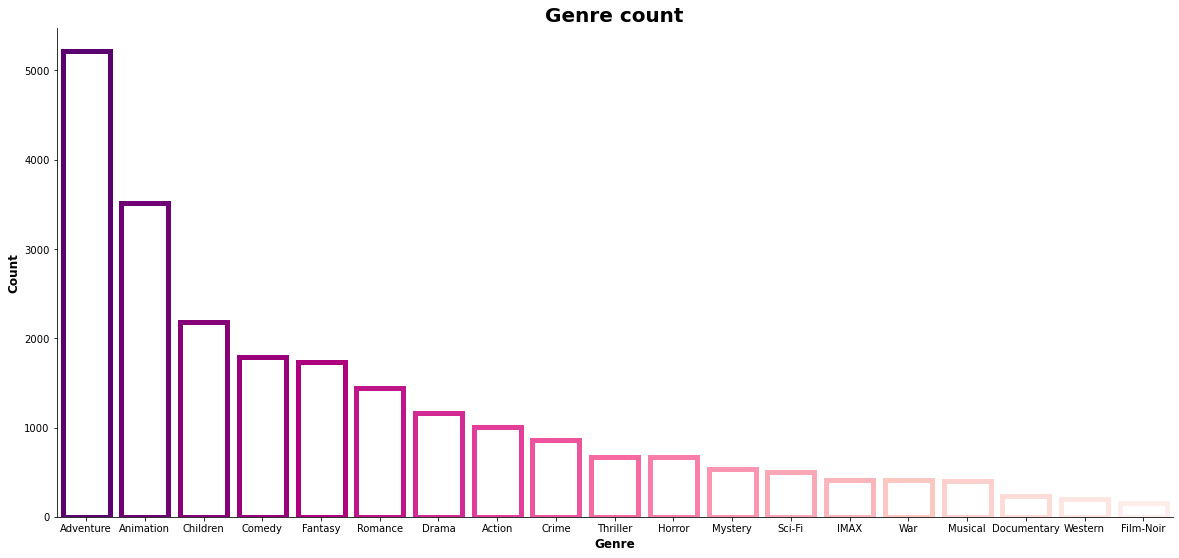

In [138]:
tmp_df = pd.melt(genre_df)[pd.melt(genre_df)["value"]==1]

plt.figure(figsize=(20,9))
sns.countplot(x="variable", hue="value", 
                   data=tmp_df,
                   facecolor=(1, 1, 1, 1),
                   linewidth=5,
                   edgecolor=sns.color_palette("RdPu_r", 19),
                   order = tmp_df['variable'].value_counts().index)

plt.xlabel("Genre", weight="bold", size = 12)
plt.ylabel("Count", weight="bold", size = 12)
plt.legend([],[], frameon=False)
plt.title("Genre count", weight="bold", size= 20)
plt.xticks(list(range(genre_df.shape[1])), genre_df.columns)
sns.despine(right=True, top=True);

del tmp_df

In [40]:
# TODO #1 : Genres Distribution
# TODO #2 : Year Distribution
# TODO #3 : Liked genres over years
# TODO #4 : Analysis of a single customer